In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# sainsburry dataset

In [2]:

data = pd.concat(
    map(pd.read_csv, ['SBRY.L (1).csv', 'SBRY.L (2020.csv']), ignore_index=True)


In [3]:
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-01-13  348.399994  353.500000  347.244995  351.200012  247.253815   
1  2014-01-14  350.500000  361.299988  348.713013  360.500000  253.801193   
2  2014-01-15  362.000000  362.600006  356.200012  356.200012  250.773941   
3  2014-01-16  356.399994  362.489014  355.500000  361.100006  254.223618   
4  2014-01-17  368.000000  371.500000  365.765015  368.600006  259.503876   

     Volume  
0   8910674  
1  12356960  
2   9046402  
3  11160654  
4  17212605

In [4]:
dataset=data.copy()

In [5]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
1745  2020-12-21  224.000000  228.447998  218.199997  220.300003  211.746857   
1746  2020-12-22  219.500000  220.000000  216.500000  217.800003  209.343918   
1747  2020-12-23  216.399994  224.300003  215.500000  224.000000  215.303207   
1748  2020-12-24  225.699997  227.100006  223.800003  226.699997  217.898376   
1749  2020-12-29  228.199997  230.100006  225.130005  230.100006  221.166367   

       Volume  
1745  6558824  
1746  6050196  
1747  5576834  
1748  1519125  
1749  9475469

In [6]:
data.shape

(1750, 7)

In [7]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

# Analysis of Close Price

In [8]:
data.Close.describe()

count    1750.000000
mean      253.795477
std        41.300313
min       174.949997
25%       226.724998
50%       248.799996
75%       273.600006
max       368.600006
Name: Close, dtype: float64

In [9]:
import plotly.express as px

fig = px.line(data, x="Date", y="Close", title="Closing price of Sainsburry stock")
fig.show()

# Analysis of Open Price

In [10]:
data.Open.describe()

count    1750.000000
mean      253.975257
std        41.525224
min       175.399994
25%       226.625004
50%       249.000000
75%       274.000000
max       368.799988
Name: Open, dtype: float64

In [11]:
import plotly.express as px

fig = px.line(data, x="Date", y="Open", title="Opening price of Sainsburry stock")
fig.show()

# Analysis of Volume

In [12]:
data.Volume.describe()

count    1.750000e+03
mean     9.636044e+06
std      6.559024e+06
min      0.000000e+00
25%      6.229777e+06
50%      8.139204e+06
75%      1.117844e+07
max      1.454218e+08
Name: Volume, dtype: float64

In [13]:
import plotly.express as px

fig = px.line(data, x="Date", y="Volume", title="Volume of Sainsburry stock")
fig.show()

# Creating a column of Market Cap visualization

In [14]:
data['MarktCap'] = data['Open'] * data['Volume']

In [15]:
data.MarktCap.describe()

count    1.750000e+03
mean     2.421498e+09
std      1.792185e+09
min      0.000000e+00
25%      1.556053e+09
50%      2.089246e+09
75%      2.749853e+09
max      4.682583e+10
Name: MarktCap, dtype: float64

In [16]:
import plotly.express as px

fig = px.line(data, x="Date", y="MarktCap", title="MarktCap of Sainsburry stock")
fig.show()

In [17]:
df=data.copy()
df['MA50'] = df['Open'].rolling(50).mean()

In [18]:
df.MA50.describe()

count    1701.000000
mean      253.069683
std        38.254074
min       188.711000
25%       232.076000
50%       249.782000
75%       268.684002
max       345.636000
Name: MA50, dtype: float64

<AxesSubplot:xlabel='Date'>

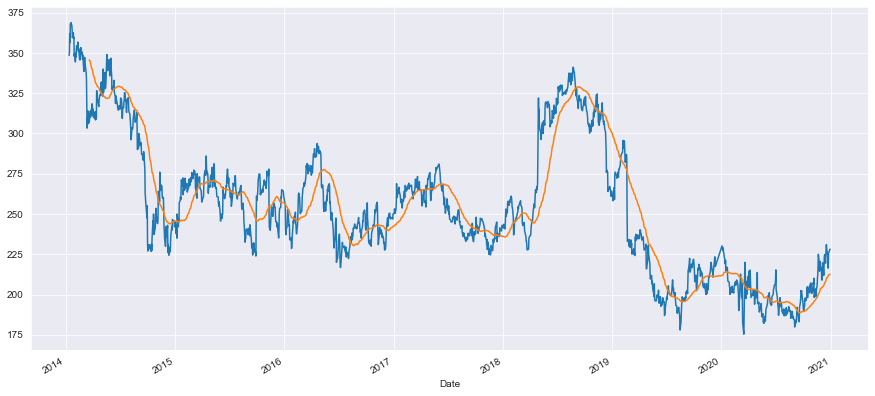

In [19]:
df['Open'].plot(figsize = (15,7))
df['MA50'].plot()

# Checking for the volatility in price

In [20]:
df['returns'] = (df['Close']/df['Close'].shift(1)) -1

In [21]:
df.returns.describe()

count    1749.000000
mean       -0.000079
std         0.017999
min        -0.185481
25%        -0.009262
50%         0.000000
75%         0.009068
max         0.145293
Name: returns, dtype: float64

In [22]:
import plotly.express as px

fig = px.line(df, x="Date", y="returns", title="returns of Sainsburry stock")
fig.show()

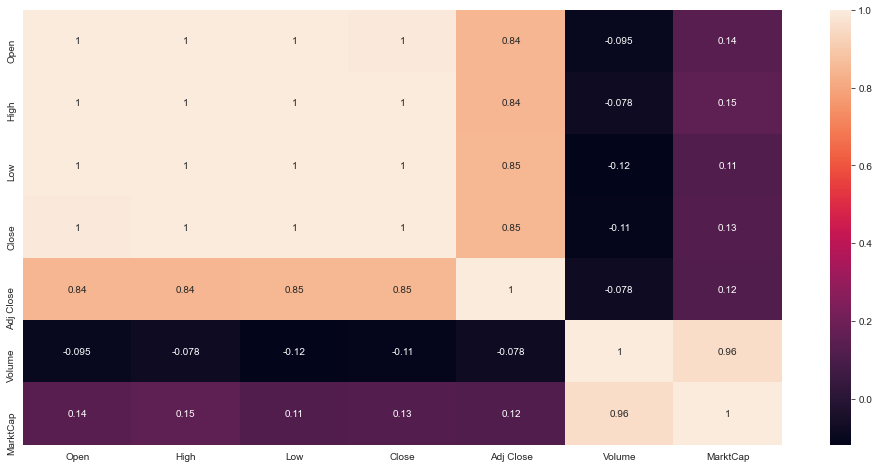

In [23]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [24]:
data.reset_index(inplace = True, drop = True)

In [25]:
training=(data['Date'] >= '2014-01-13') & (data['Date'] <= '2018-12-31')
train = data.loc[training]

train.head()

Date        Open        High         Low       Close   Adj Close  \
0 2014-01-13  348.399994  353.500000  347.244995  351.200012  247.253815   
1 2014-01-14  350.500000  361.299988  348.713013  360.500000  253.801193   
2 2014-01-15  362.000000  362.600006  356.200012  356.200012  250.773941   
3 2014-01-16  356.399994  362.489014  355.500000  361.100006  254.223618   
4 2014-01-17  368.000000  371.500000  365.765015  368.600006  259.503876   

     Volume      MarktCap  
0   8910674  3.104479e+09  
1  12356960  4.331114e+09  
2   9046402  3.274798e+09  
3  11160654  3.977657e+09  
4  17212605  6.334239e+09

In [26]:
testing=(data['Date'] >= '2019-01-02') & (data['Date'] <= '2020-11-30')
test = data.loc[testing]
test.head()

Date        Open        High         Low       Close   Adj Close  \
1257 2019-01-02  261.500000  263.600006  259.200012  261.500000  229.368866   
1258 2019-01-03  260.000000  265.700012  260.000000  263.000000  230.684586   
1259 2019-01-04  258.200012  263.200012  257.399994  260.000000  228.053192   
1260 2019-01-07  261.700012  268.000000  261.000000  265.700012  233.052841   
1261 2019-01-08  266.399994  269.000000  259.299988  266.500000  233.754517   

        Volume      MarktCap  
1257   6133405  1.603885e+09  
1258   4880935  1.269043e+09  
1259   7337558  1.894558e+09  
1260   7192467  1.882269e+09  
1261  14955816  3.984229e+09

In [27]:
features = train[['High','Low','Close','Adj Close','Volume','MarktCap']]
target= train['Open'] 

# Linear regression

In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(features,target)


LinearRegression()

In [29]:
LR.coef_

array([ 9.21344137e-01,  4.01647766e-01, -3.43807314e-01,  1.42243516e-03,
       -6.85967719e-07,  2.13856982e-09])

In [30]:
pd.DataFrame(LR.coef_, 
             features.columns, 
             columns=['coefficient']).sort_values(by='coefficient', ascending=False)

coefficient
High       9.213441e-01
Low        4.016478e-01
Adj Close  1.422435e-03
MarktCap   2.138570e-09
Volume    -6.859677e-07
Close     -3.438073e-01

In [31]:
testing= test[['High','Low','Close','Adj Close','Volume','MarktCap']]

In [32]:
prediction = LR.predict(testing)

In [33]:
final_df = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction})
final_df

Actual   Predicted
1257  261.500000  261.583953
1258  260.000000  263.469325
1259  258.200012  260.801900
1260  261.700012  264.790928
1261  266.399994  263.925205
...          ...         ...
1726  214.500000  216.721045
1727  219.600006  221.512136
1728  220.600006  220.213827
1729  215.899994  214.019293
1730  216.899994  209.360828

[474 rows x 2 columns]

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction)))

Mean Absolute Error: 1.6873236864632475
Mean Squared Error: 5.661609360994065
Root Mean Squared Error: 2.3794136590752912


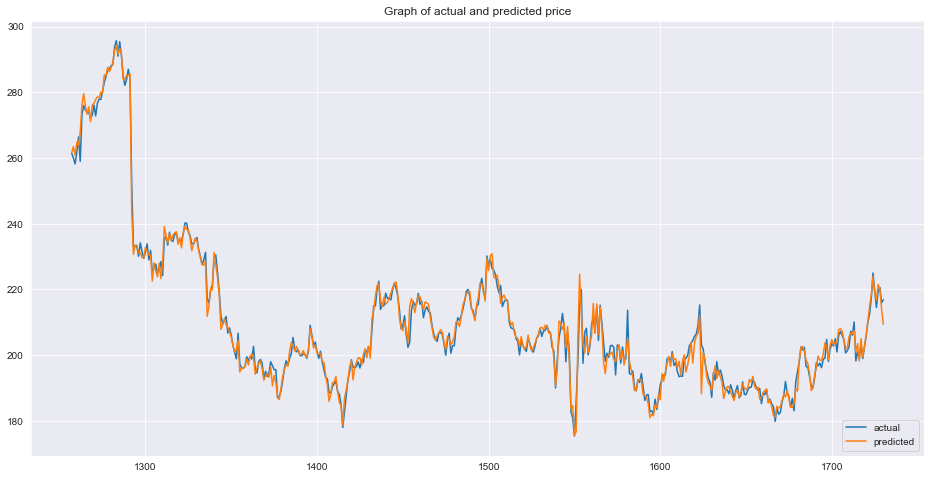

In [35]:
plt.figure(figsize=(16,8))
plt.plot(final_df['Actual'], label='Actual Price')
plt.plot(final_df['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# Suppoprt Vector Regression

In [36]:
from sklearn.svm import SVR

params = {'C':[10,100,100]}

svr = SVR()

svr = GridSearchCV(svr, params, cv=5)
svr.fit(features,target)
svr.best_params_

{'C': 100}

In [37]:
svr = SVR(kernel = 'poly',C=100,coef0=1.0,degree=2,epsilon=0.1)
svr.fit(features,target)

SVR(C=100, coef0=1.0, degree=2, kernel='poly')

In [38]:
prediction_svr = svr.predict(testing)

In [39]:
final_df_svr = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction_svr})
final_df_svr

Actual   Predicted
1257  261.500000  259.851584
1258  260.000000  258.538940
1259  258.200012  260.974660
1260  261.700012  260.931440
1261  266.399994  268.783057
...          ...         ...
1726  214.500000  262.099031
1727  219.600006  258.445138
1728  220.600006  258.198697
1729  215.899994  262.846804
1730  216.899994  282.679061

[474 rows x 2 columns]

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction_svr))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction_svr)))

Mean Absolute Error: 54.19619036445766
Mean Squared Error: 3234.026897573145
Root Mean Squared Error: 56.86850532213015


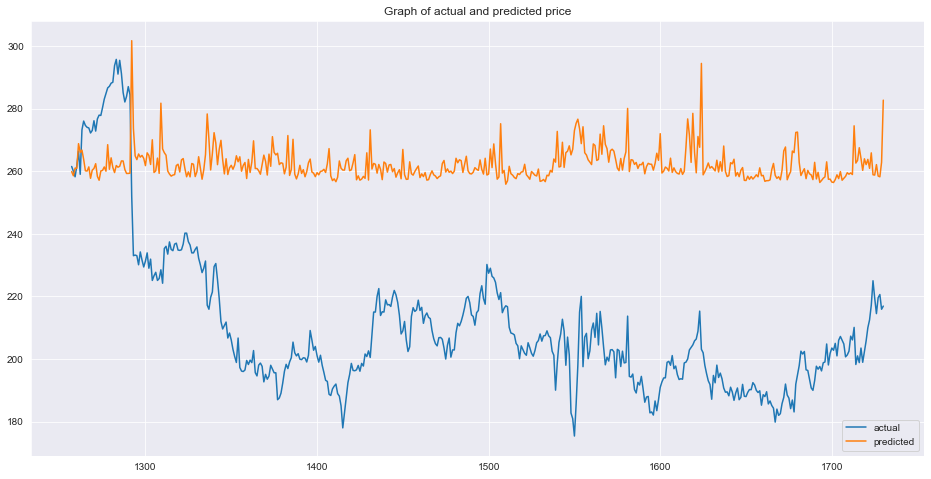

In [41]:
plt.figure(figsize=(16,8))
plt.plot(final_df_svr['Actual'], label='Actual Price')
plt.plot(final_df_svr['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# Random forest regressor

In [42]:
params = {'n_estimators':[50,60,70,80,90,100,110,120,130,140,150,160]}

rfr = RandomForestRegressor()

regressor = GridSearchCV(rfr, params, cv=5)
regressor.fit(features,target)
regressor.best_params_

{'n_estimators': 100}

In [43]:
regressor = RandomForestRegressor(n_estimators = 60, random_state = 0)
regressor.fit(features,target)  

RandomForestRegressor(n_estimators=60, random_state=0)

In [44]:
prediction_rf = regressor.predict(testing)

In [45]:
final_df_rf = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction_rf})
final_df_rf

Actual   Predicted
1257  261.500000  262.320001
1258  260.000000  262.996668
1259  258.200012  260.475002
1260  261.700012  264.440002
1261  266.399994  264.298334
...          ...         ...
1726  214.500000  218.974999
1727  219.600006  223.096664
1728  220.600006  219.359998
1729  215.899994  218.021665
1730  216.899994  219.833331

[474 rows x 2 columns]

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction_svr))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction_svr)))

Mean Absolute Error: 54.19619036445766
Mean Squared Error: 3234.026897573145
Root Mean Squared Error: 56.86850532213015


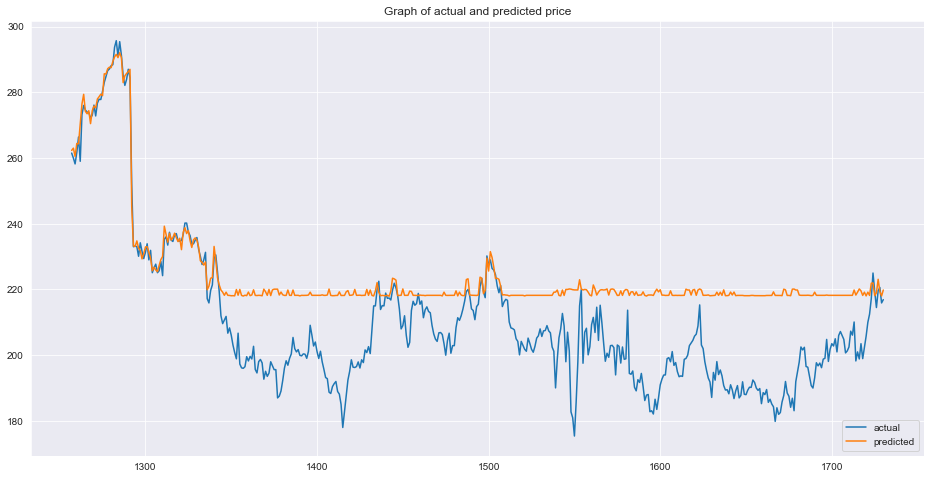

In [47]:
plt.figure(figsize=(16,8))
plt.plot(final_df_rf['Actual'], label='Actual Price')
plt.plot(final_df_rf['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# K nearesest neighbour

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(features)

x_test_scaled = scaler.fit_transform(testing)

In [49]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(x_train_scaled,target)
model.best_params_

{'n_neighbors': 3}

In [50]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train_scaled,target)  #fit the model

KNeighborsRegressor(n_neighbors=3)

In [51]:
pred=model.predict(x_test_scaled) #make prediction on test set


In [52]:
final_df_knn = pd.DataFrame({'Actual': test['Open'], 'Predicted': pred})
final_df_knn

Actual   Predicted
1257  261.500000  325.633331
1258  260.000000  335.833333
1259  258.200012  328.366659
1260  261.700012  339.366669
1261  266.399994  322.333333
...          ...         ...
1726  214.500000  268.566671
1727  219.600006  275.733337
1728  220.600006  267.799998
1729  215.899994  265.733337
1730  216.899994  268.433329

[474 rows x 2 columns]

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], pred))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], pred)))

Mean Absolute Error: 49.06083015471168
Mean Squared Error: 2461.7697256809006
Root Mean Squared Error: 49.61622441984981


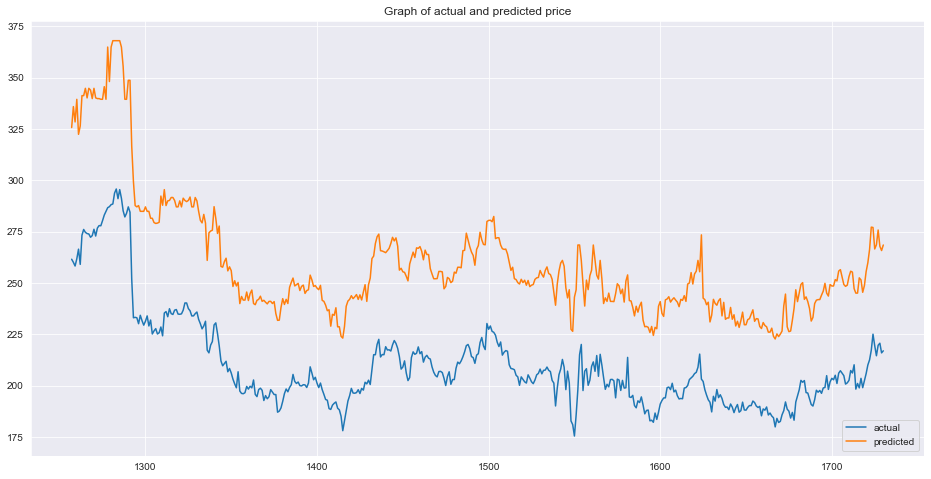

In [54]:
plt.figure(figsize=(16,8))
plt.plot(final_df_knn['Actual'], label='Actual Price')
plt.plot(final_df_knn['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# tesco dataset

In [55]:

data = pd.concat(
    map(pd.read_csv, ['TSCO.L (2).csv', 'TSCO.L 2020.csv']), ignore_index=True)


In [56]:
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-01-13  407.929810  415.276489  407.803101  413.629791  290.281006   
1  2014-01-14  411.603088  420.026398  409.306702  419.519806  294.414520   
2  2014-01-15  421.799805  422.179810  416.099792  420.849792  295.347900   
3  2014-01-16  422.179810  423.573090  417.366394  422.179810  296.281281   
4  2014-01-17  424.143097  428.259796  419.393097  419.393097  294.325623   

     Volume  
0  12738492  
1  13905882  
2  13765221  
3  11438164  
4  19109377

In [57]:
dataset=data.copy()

In [58]:
data.tail()

Date        Open        High         Low       Close   Adj Close  \
1726  2020-11-24  288.546509  289.433197  286.519806  287.659790  230.664230   
1727  2020-11-25  287.153198  290.699799  285.759796  289.813202  232.390976   
1728  2020-11-26  290.826508  290.953186  286.646515  288.419800  231.273666   
1729  2020-11-27  285.126495  290.066498  284.974487  288.546509  231.375259   
1730  2020-11-30  288.166504  291.459808  286.266510  287.533203  230.562729   

        Volume  
1726  16069476  
1727  19311149  
1728  14313999  
1729  47067813  
1730  29701270

In [59]:
data.shape

(1731, 7)

In [60]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

# Analysis of Close Price

In [61]:
data.Close.describe()

count    1731.000000
mean      273.908911
std        47.242239
min       176.319901
25%       237.056503
50%       271.826508
75%       300.263154
max       425.283112
Name: Close, dtype: float64

In [62]:
import plotly.express as px

fig = px.line(data, x="Date", y="Close", title="Closing price of Tesco stock")
fig.show()

# Analysis of Open Price

In [63]:
data.Open.describe()

count    1731.000000
mean      274.008144
std        47.387232
min       175.559906
25%       237.151550
50%       271.636505
75%       300.073212
max       424.143097
Name: Open, dtype: float64

In [64]:
import plotly.express as px

fig = px.line(data, x="Date", y="Open", title="Opening price of Tesco stock")
fig.show()

# Analysis of Volume

In [65]:
data.Volume.describe()

count    1.731000e+03
mean     2.237021e+07
std      1.355109e+07
min      0.000000e+00
25%      1.471698e+07
50%      1.922495e+07
75%      2.593828e+07
max      1.955998e+08
Name: Volume, dtype: float64

In [66]:
import plotly.express as px

fig = px.line(data, x="Date", y="Volume", title="Volume of tesco stock")
fig.show()

# Creating a column of Market Cap visualization

In [67]:
data['MarktCap'] = data['Open'] * data['Volume']

In [68]:
data.MarktCap.describe()

count    1.731000e+03
mean     6.057656e+09
std      3.652966e+09
min      0.000000e+00
25%      3.971811e+09
50%      5.228327e+09
75%      7.014023e+09
max      5.155878e+10
Name: MarktCap, dtype: float64

In [69]:
import plotly.express as px

fig = px.line(data, x="Date", y="MarktCap", title="MarktCap of tesco stock")
fig.show()

In [70]:
df=data.copy()
df['MA50'] = df['Open'].rolling(50).mean()

In [71]:
df.MA50.describe()

count    1682.000000
mean      271.916500
std        42.851374
min       198.775333
25%       235.540961
50%       270.769471
75%       297.790319
max       408.544125
Name: MA50, dtype: float64

<AxesSubplot:xlabel='Date'>

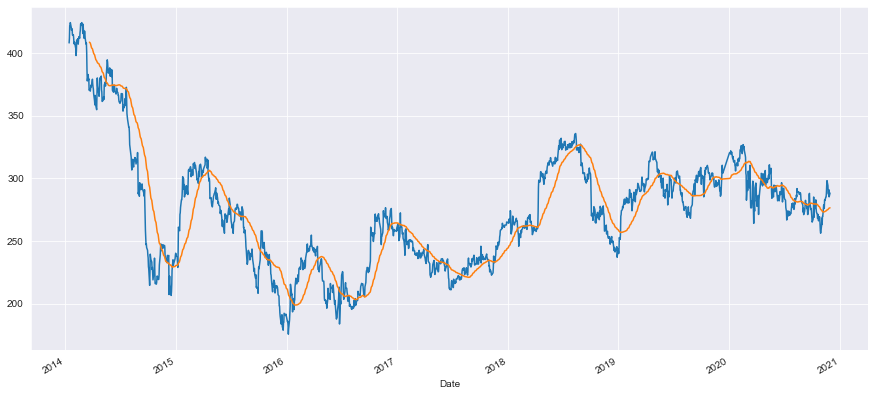

In [72]:
df['Open'].plot(figsize = (15,7))
df['MA50'].plot()

# Checking for the volatility in price

In [73]:
df['returns'] = (df['Close']/df['Close'].shift(1)) -1

In [74]:
df.returns.describe()

count    1730.000000
mean       -0.000055
std         0.017634
min        -0.115854
25%        -0.009494
50%        -0.000444
75%         0.008833
max         0.149725
Name: returns, dtype: float64

In [75]:
import plotly.express as px

fig = px.line(df, x="Date", y="returns", title="returns of tesco stock")
fig.show()

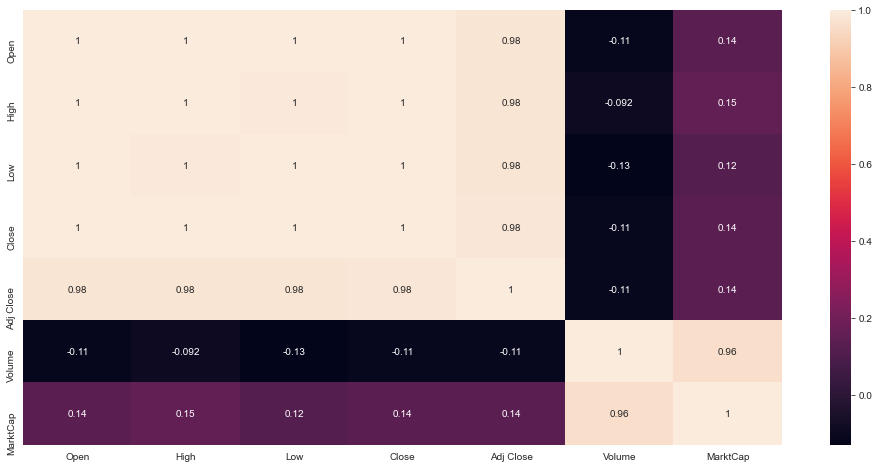

In [76]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [77]:
data.reset_index(inplace = True, drop = True)

In [78]:
training=(data['Date'] >= '2014-01-13') & (data['Date'] <= '2018-12-31')
train = data.loc[training]

train.head()

Date        Open        High         Low       Close   Adj Close  \
0 2014-01-13  407.929810  415.276489  407.803101  413.629791  290.281006   
1 2014-01-14  411.603088  420.026398  409.306702  419.519806  294.414520   
2 2014-01-15  421.799805  422.179810  416.099792  420.849792  295.347900   
3 2014-01-16  422.179810  423.573090  417.366394  422.179810  296.281281   
4 2014-01-17  424.143097  428.259796  419.393097  419.393097  294.325623   

     Volume      MarktCap  
0  12738492  5.196411e+09  
1  13905882  5.723704e+09  
2  13765221  5.806168e+09  
3  11438164  4.828962e+09  
4  19109377  8.105110e+09

In [79]:
testing=(data['Date'] >= '2019-01-02') & (data['Date'] <= '2020-11-30')
test = data.loc[testing]
test.head()

Date        Open        High         Low       Close   Adj Close  \
1257 2019-01-02  239.906494  243.769897  238.259903  242.629898  181.155014   
1258 2019-01-03  241.933197  253.269806  240.539902  252.509796  188.531677   
1259 2019-01-04  252.636505  253.839798  249.026505  250.039795  186.687485   
1260 2019-01-07  251.179794  257.133209  250.229797  256.499786  191.510712   
1261 2019-01-08  255.866501  267.646515  254.599792  263.593201  196.806870   

        Volume      MarktCap  
1257  27393367  6.571847e+09  
1258  35018309  8.472091e+09  
1259  24514166  6.193173e+09  
1260  35072819  8.809583e+09  
1261  30786714  7.877289e+09

In [80]:
features = train[['High','Low','Close','Adj Close','Volume','MarktCap']]
target= train['Open'] 

# Linear regression

In [81]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(features,target)


LinearRegression()

In [82]:
LR.coef_

array([ 8.19662498e-01,  6.40061884e-01, -4.53171498e-01, -2.51711232e-02,
       -1.70045409e-07,  5.86562587e-10])

In [83]:
pd.DataFrame(LR.coef_, 
             features.columns, 
             columns=['coefficient']).sort_values(by='coefficient', ascending=False)

coefficient
High       8.196625e-01
Low        6.400619e-01
MarktCap   5.865626e-10
Volume    -1.700454e-07
Adj Close -2.517112e-02
Close     -4.531715e-01

In [84]:
testing= test[['High','Low','Close','Adj Close','Volume','MarktCap']]

In [85]:
prediction = LR.predict(testing)

In [86]:
final_df = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction})
final_df

Actual   Predicted
1257  239.906494  239.962587
1258  241.933197  244.363705
1259  252.636505  251.878065
1260  251.179794  252.038080
1261  255.866501  260.286649
...          ...         ...
1726  288.546509  287.418484
1727  287.153198  286.932529
1728  290.826508  288.406247
1729  285.126495  286.409685
1730  288.166504  288.959961

[474 rows x 2 columns]

In [87]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction)))

Mean Absolute Error: 1.9401591215722425
Mean Squared Error: 24.75045409067776
Root Mean Squared Error: 4.974982823154042


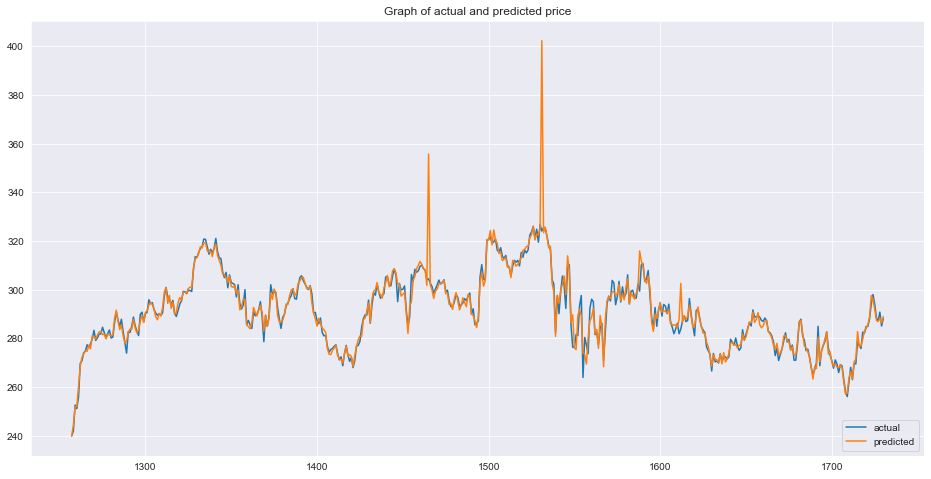

In [88]:
plt.figure(figsize=(16,8))
plt.plot(final_df['Actual'], label='Actual Price')
plt.plot(final_df['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# Suppoprt Vector Regression

In [89]:
from sklearn.svm import SVR

params = {'C':[10,100,100]}

svr = SVR()

svr = GridSearchCV(svr, params, cv=5)
svr.fit(features,target)
svr.best_params_

{'C': 100}

In [90]:
svr = SVR(kernel = 'poly',C=100,coef0=1.0,degree=2,epsilon=0.1)
svr.fit(features,target)

SVR(C=100, coef0=1.0, degree=2, kernel='poly')

In [91]:
prediction_svr = svr.predict(testing)

In [92]:
final_df_svr = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction_svr})
final_df_svr

Actual   Predicted
1257  239.906494  259.640315
1258  241.933197  269.372278
1259  252.636505  257.562164
1260  251.179794  270.992229
1261  255.866501  266.563031
...          ...         ...
1726  288.546509  248.246540
1727  287.153198  253.866383
1728  290.826508  245.177340
1729  285.126495  287.877770
1730  288.166504  270.007884

[474 rows x 2 columns]

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction_svr))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction_svr)))

Mean Absolute Error: 36.94079978106828
Mean Squared Error: 1712.4086155406796
Root Mean Squared Error: 41.38125923096927


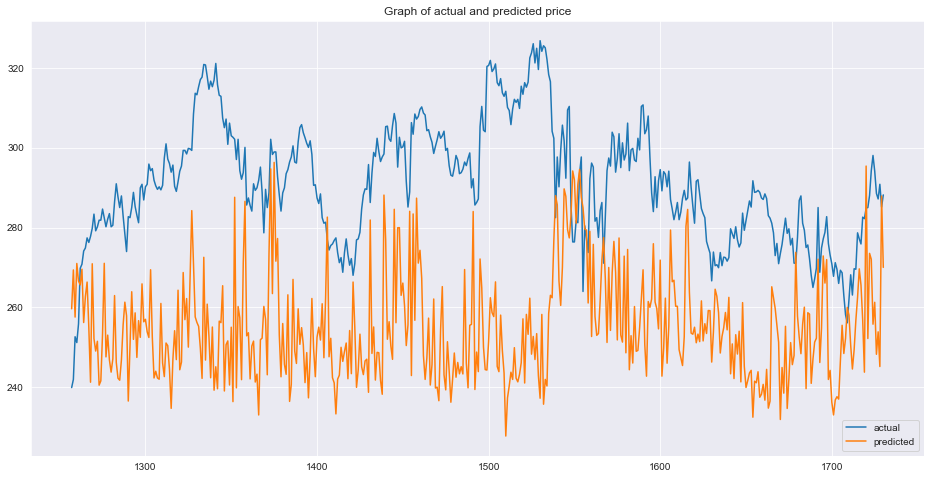

In [94]:
plt.figure(figsize=(16,8))
plt.plot(final_df_svr['Actual'], label='Actual Price')
plt.plot(final_df_svr['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# Random forest regressor

In [95]:
params = {'n_estimators':[50,60,70,80,90,100,110,120,130,140,150,160]}

rfr = RandomForestRegressor()

regressor = GridSearchCV(rfr, params, cv=5)
regressor.fit(features,target)
regressor.best_params_

{'n_estimators': 50}

In [96]:
regressor = RandomForestRegressor(n_estimators = 80, random_state = 0)
regressor.fit(features,target)  

RandomForestRegressor(n_estimators=80, random_state=0)

In [97]:
prediction_rf = regressor.predict(testing)

In [98]:
final_df_rf = pd.DataFrame({'Actual': test['Open'], 'Predicted': prediction_rf})
final_df_rf

Actual   Predicted
1257  239.906494  241.587245
1258  241.933197  246.174947
1259  252.636505  252.706959
1260  251.179794  251.475137
1261  255.866501  257.150571
...          ...         ...
1726  288.546509  287.099327
1727  287.153198  287.541090
1728  290.826508  288.579755
1729  285.126495  287.144467
1730  288.166504  287.837172

[474 rows x 2 columns]

In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], prediction_svr))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], prediction_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], prediction_svr)))

Mean Absolute Error: 36.94079978106828
Mean Squared Error: 1712.4086155406796
Root Mean Squared Error: 41.38125923096927


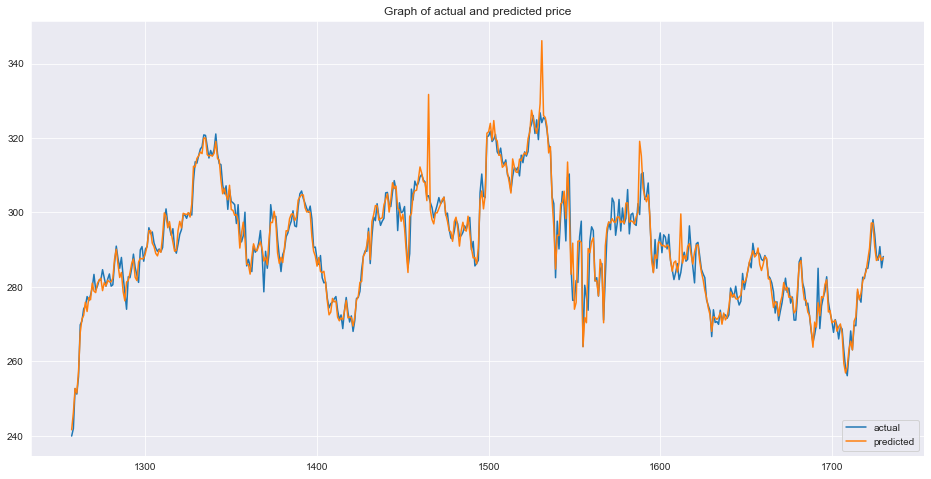

In [100]:
plt.figure(figsize=(16,8))
plt.plot(final_df_rf['Actual'], label='Actual Price')
plt.plot(final_df_rf['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()

# K nearesest neighbour

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(features)

x_test_scaled = scaler.fit_transform(testing)

In [102]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(x_train_scaled,target)
model.best_params_

{'n_neighbors': 2}

In [103]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(x_train_scaled,target)  #fit the model

KNeighborsRegressor(n_neighbors=2)

In [104]:
pred=model.predict(x_test_scaled) #make prediction on test set


In [105]:
final_df_knn = pd.DataFrame({'Actual': test['Open'], 'Predicted': pred})
final_df_knn

Actual   Predicted
1257  239.906494  178.694901
1258  241.933197  191.551498
1259  252.636505  195.003205
1260  251.179794  209.728203
1261  255.866501  221.191551
...          ...         ...
1726  288.546509  300.959809
1727  287.153198  303.936509
1728  290.826508  301.466507
1729  285.126495  302.859848
1730  288.166504  302.353149

[474 rows x 2 columns]

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['Open'], pred))
print('Mean Squared Error:', metrics.mean_squared_error(test['Open'], pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Open'], pred)))

Mean Absolute Error: 18.8013065
Mean Squared Error: 574.4714844511724
Root Mean Squared Error: 23.96813477205042


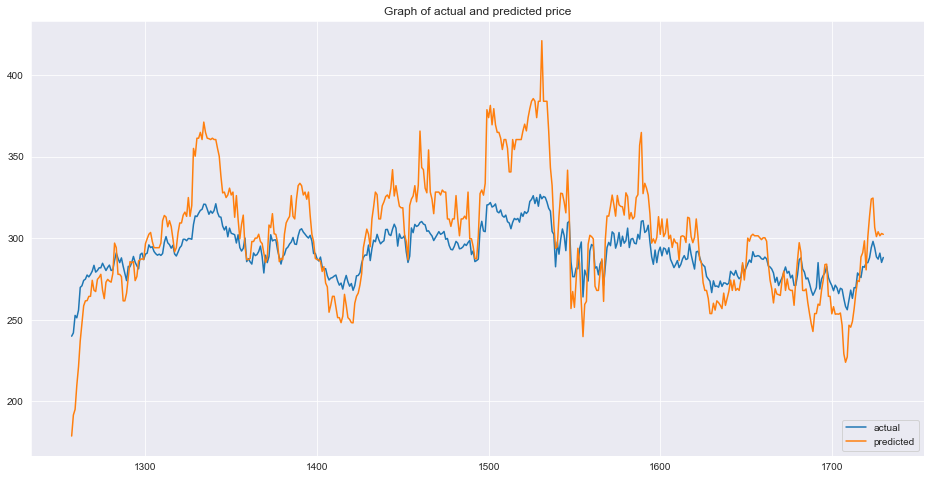

In [107]:
plt.figure(figsize=(16,8))
plt.plot(final_df_knn['Actual'], label='Actual Price')
plt.plot(final_df_knn['Predicted'], label='Predicted Price')
plt.legend(["actual", "predicted"], loc ="lower right")
plt.title("Graph of actual and predicted price")
plt.show()